In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math


In [27]:
data_x = []
data_y = []
new_mu_x = []
new_mu_y = []
new_var_x = []
new_var_y = []
s_b = []
s_w = []

N = 400
prior = [0.5, 0.5]
l_1 = 0

mu_x = [0, 0]
variance_x = [[3, 1], [1, 0.8]]

mu_y = [3,3]
variance_y = [[3, 1], [1, 0.8]]

In [28]:
#generating sample and checking for prior values
for i in range(N):
    if np.random.uniform(0, 1, 1) <= prior[0]:
        l_1 = l_1 + 1

l_2 = N - l_1

In [29]:
#generating data according to for label x
z = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], l_1)
for i in range(l_1):
    data_x.append(np.matmul(sqrtm(variance_x),z[i, :]) + mu_x)

z = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], l_2)
for i in range(l_2):
    data_y.append(np.matmul(sqrtm(variance_y),z[i, :]) + mu_y)    


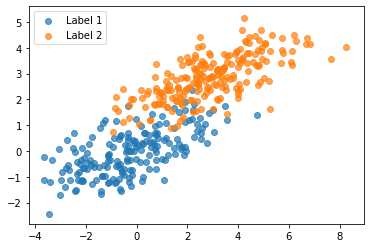

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(data_x)[:, 0], np.array(data_x)[:, 1], alpha=0.7, label='Label 1')
ax.scatter(np.array(data_y)[:, 0], np.array(data_y)[:, 1], alpha=0.7, label='Label 2')
ax.legend()
plt.show()

In [31]:
new_mu_x = [np.array(data_x)[:, 0].mean(), np.array(data_x)[:, 1].mean()]
new_mu_y = [np.array(data_y)[:, 0].mean(), np.array(data_y)[:, 1].mean()]
data_x_t = np.reshape(data_x, (2,l_1))
data_y_t = np.reshape(data_y, (2,l_2))
new_var_x = np.cov(data_x_t)
new_var_y = np.cov(data_y_t)

In [32]:
s_b = np.matmul(np.subtract(new_mu_x, new_mu_y).reshape(2, 1), (np.subtract(new_mu_x, new_mu_y)).reshape(1, 2))
s_w = np.add(new_var_x, new_var_y)

In [33]:
V, D = np.linalg.eig(np.matmul((np.linalg.inv(s_w)), s_b))

In [34]:
ind = np.argmax(V)

vec = D[:, ind]
new_ax_x = np.matmul(vec, np.reshape(data_x, (2, l_1)))
new_ax_y = np.matmul(vec, np.reshape(data_y, (2, l_2)))

In [35]:
tr = 0
err = []
for i in range(l_1):
    count = 0
    tr = new_ax_x[i]
    for j in range(l_1):
        if new_ax_x[j] > tr:
            count = count + 1
    for j in range(l_2):
        if new_ax_y[j] < tr:
            count = count +1
    err.append([tr, count])

for i in range(l_2):
    count = 0
    tr = new_ax_y[i]
    for j in range(l_1):
        if new_ax_x[j] > tr:
            count = count + 1
    for j in range(l_2):
        if new_ax_y[j] < tr:
            count = count +1
    err.append([tr, count])

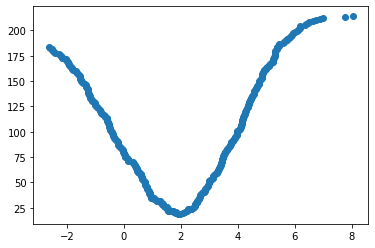

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(err)[:, 0], np.array(err)[:, 1])
plt.show()

In [37]:
e = np.argmin(np.array(err)[:, 1])
thresh = err[e][0]

In [38]:
x_right = []
x_error = []
y_right = []
y_error = []

for i in range(l_1):
    if new_ax_x[i] < thresh:
        x_right.append(np.array(new_ax_x)[i])
    else:
        x_error.append(np.array(new_ax_x)[i])
        
for i in range(l_2):
    if new_ax_y[i] > thresh:
        y_right.append(np.array(new_ax_y)[i])
    else:
        y_error.append(np.array(new_ax_y)[i])


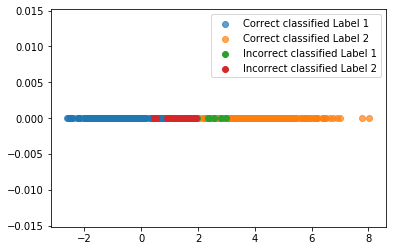

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(x_right), np.zeros(len(x_right)), alpha=0.7, label='Correct classified Label 1')
ax.scatter(np.array(y_right), np.zeros(len(y_right)), alpha=0.7, label='Correct classified Label 2')
ax.scatter(np.array(x_error), np.zeros(len(x_error)), alpha=1, label='Incorrect classified Label 1')
ax.scatter(np.array(y_error), np.zeros(len(y_error)), alpha=1, label='Incorrect classified Label 2')
ax.legend()
plt.show()

In [40]:
print("The error probability is {}.".format((len(x_error) + len(y_error))/400))

The error probability is 0.05.
